In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    "../data/cleaned/cleaned_sales_data.csv",
    parse_dates=["order_date"]
)

df.head()

,order_date,ship_date,ship_mode,segment,country,city,state,region,category,sub_category,sales,quantity,discount,profit
0,2014-01-06,2014-01-10,Standard Class,Home Office,United States,Henderson,Kentucky,South,Furniture,Chairs,2573.820,9,0.0,746.4078
1,2014-01-07,2014-01-12,Standard Class,Consumer,United States,Huntsville,Texas,Central,Furniture,Furnishings,76.728,3,0.6,-53.7096
2,2014-01-10,2014-01-15,Standard Class,Corporate,United States,Springfield,Virginia,South,Furniture,Furnishings,51.940,1,0.0,21.2954
3,2014-01-11,2014-01-14,First Class,Consumer,United States,Dover,Delaware,East,Furniture,Furnishings,9.940,2,0.0,3.0814
4,2014-01-13,2014-01-16,Second Class,Consumer,United States,Mount Pleasant,South Carolina,South,Furniture,Chairs,545.940,6,0.0,87.3504


In [3]:
df = df.set_index("order_date")
df.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-13', '2014-01-14', '2014-01-16',
               '2014-01-19', '2014-01-20',
               ...
               '2017-12-28', '2017-12-28', '2017-12-28', '2017-12-29',
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='order_date', length=2121, freq=None)

In [4]:
monthly_sales = (
    df.resample("M")["sales"]
      .sum()
      .reset_index()
)

monthly_sales.head()

C:\Users\tathi\AppData\Local\Temp\ipykernel_2932\1505487771.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample("M")["sales"]


,order_date,sales
0,2014-01-31,6242.525
1,2014-02-28,1839.658
2,2014-03-31,14573.956
3,2014-04-30,7944.837
4,2014-05-31,6912.787


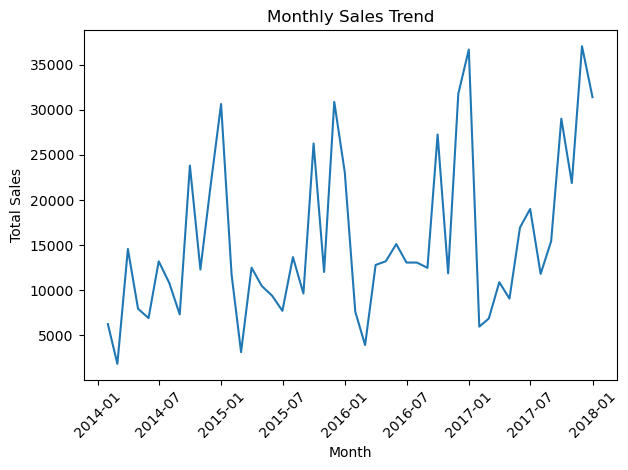

In [5]:
plt.figure()
plt.plot(monthly_sales["order_date"], monthly_sales["sales"])
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
monthly_sales["rolling_3_month_avg"] = (
    monthly_sales["sales"]
    .rolling(window=3)
    .mean()
)


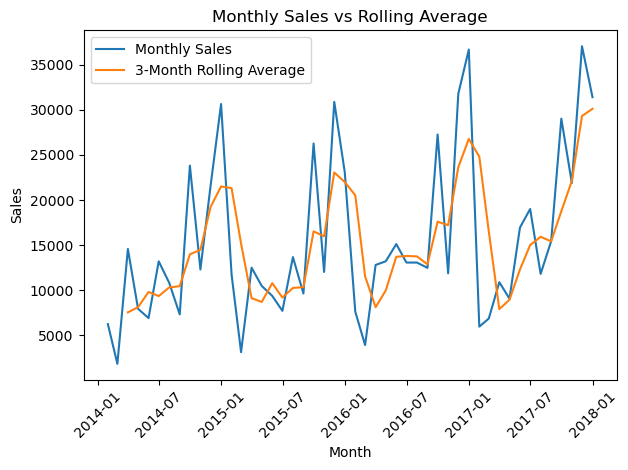

In [7]:
plt.figure()
plt.plot(monthly_sales["order_date"], monthly_sales["sales"], label="Monthly Sales")
plt.plot(
    monthly_sales["order_date"],
    monthly_sales["rolling_3_month_avg"],
    label="3-Month Rolling Average"
)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales vs Rolling Average")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
monthly_sales["mom_growth_pct"] = (
    monthly_sales["sales"]
    .pct_change() * 100
)

monthly_sales.head()


,order_date,sales,rolling_3_month_avg,mom_growth_pct
0,2014-01-31,6242.525,NaN,NaN
1,2014-02-28,1839.658,NaN,-70.530226
2,2014-03-31,14573.956,7552.046333,692.210074
3,2014-04-30,7944.837,8119.483667,-45.486064
4,2014-05-31,6912.787,9810.526667,-12.990197


In [9]:
category_monthly_sales = (
    df.groupby("category")
      .resample("M")["sales"]
      .sum()
      .reset_index()
)

category_monthly_sales.head()


C:\Users\tathi\AppData\Local\Temp\ipykernel_2932\1174444613.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["sales"]


,category,order_date,sales
0,Furniture,2014-01-31,6242.525
1,Furniture,2014-02-28,1839.658
2,Furniture,2014-03-31,14573.956
3,Furniture,2014-04-30,7944.837
4,Furniture,2014-05-31,6912.787


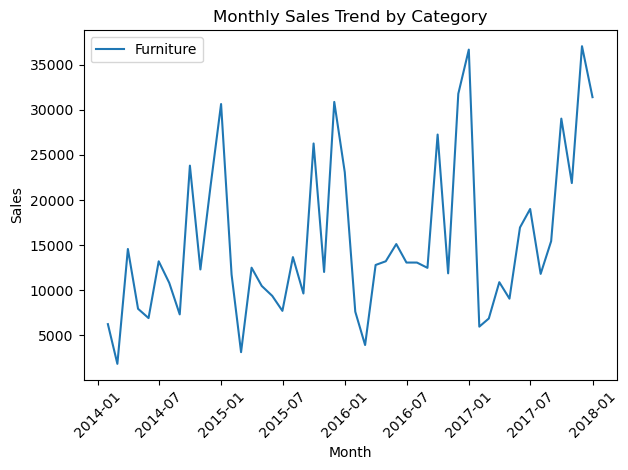

In [10]:
plt.figure()

for category in category_monthly_sales["category"].unique():
    data = category_monthly_sales[category_monthly_sales["category"] == category]
    plt.plot(data["order_date"], data["sales"], label=category)

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend by Category")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
monthly_sales.to_csv(
    "../data/processed/monthly_sales_trends.csv",
    index=False
)

category_monthly_sales.to_csv(
    "../data/processed/category_monthly_sales.csv",
    index=False
)


## Trend Analysis Insights

Monthly sales show clear temporal variation

Rolling averages reduce short-term volatility

Certain product categories demonstrate stronger growth patterns

Month-over-month growth highlights periods of rapid change